In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Define the dataset

In [2]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
print(dataset)

[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


- Here we can quickly analyze ans see that some of the outliers are **102, 107 and 108** are the outliers.
- Using the Z-score we can come to an understanding that most of the times values after the 3-SD is considered as Outliers.

#### Detect Outliers using Z-Score

In [3]:
outliers = []

def detect_outliers(data):
    threshold = 3              ### 3-SD. Keeping it so that anything above the third std deviation is an outliers.
    mean = np.mean(data)
    std = np.std(data)
    
    for x in data:
        z_score = (x-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(x)
        else:
            pass
    return outliers

detect_outliers(dataset)

[102, 107, 108]

#### Detect Outliers using Inter Quartile Range

1. Sort the Data
2. Calculate Q1 and Q3
3. Obtain IQR -> Q3-Q1
4. Find the Lower Fence -> Q1 - 1.5*IQR
5. Find the Upper Fence -> Q3 + 1.5*IQR

In [4]:
### STEP 1: Sorting

dataset = sorted(dataset)
print(dataset)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [5]:
### STEP 3: Calculate Q1 and Q3

Q1, Q3 = np.percentile(dataset, [25,75])
print(f'Q1: {Q1}')
print()
print(f'Q3: {Q3}')

Q1: 12.0

Q3: 15.0


In [6]:
### STEP 3: IQR

IQR = Q3 - Q1
IQR

3.0

In [7]:
### STEP 4: Obtain the Lower and Upper Fence

Lower_Fence = Q1 - (1.5)*IQR
print(f'Lower Fence: {Lower_Fence}')
print()
Upper_Fence = Q3 + (1.5)*IQR
print(f'Upper Fence: {Upper_Fence}')

Lower Fence: 7.5

Upper Fence: 19.5


- Any datapoint that lies above the Upper Fence and that lies below the Lower Fence can be considered as Outliers.

#### Detect Outliers using Boxplot

In [8]:
import seaborn as sns

/Users/eben.emmanuel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

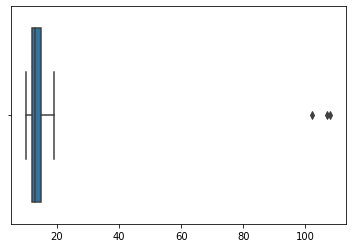

In [9]:
sns.boxplot(dataset)